# 1. Setup and Load Data

## 1.1 Import Dependencies and Setup

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
DATASET_PATH = "C:/Users/bluew/Downloads/dataset"
species = os.listdir(DATASET_PATH)
len(species)

100

# 2. Preprocess Images

## 2.1 Set Parameters

In [5]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

## 2.2 Load Dataset and split into training & validation sets

In [6]:
# Training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Validation+Test dataset
val_test_dataset = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_size = int(tf.data.experimental.cardinality(val_test_dataset).numpy() * 0.5)

# Split val_test_dataset into validation and test datasets
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Class names
dataset_cat = train_dataset.class_names

Found 77382 files belonging to 100 classes.
Using 54168 files for training.
Found 77382 files belonging to 100 classes.
Using 23214 files for validation.


## 2.3 Normalize the images

In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

## 2.4 Prefetch Images to Improve Performance

In [41]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## 2.5 Plot some images

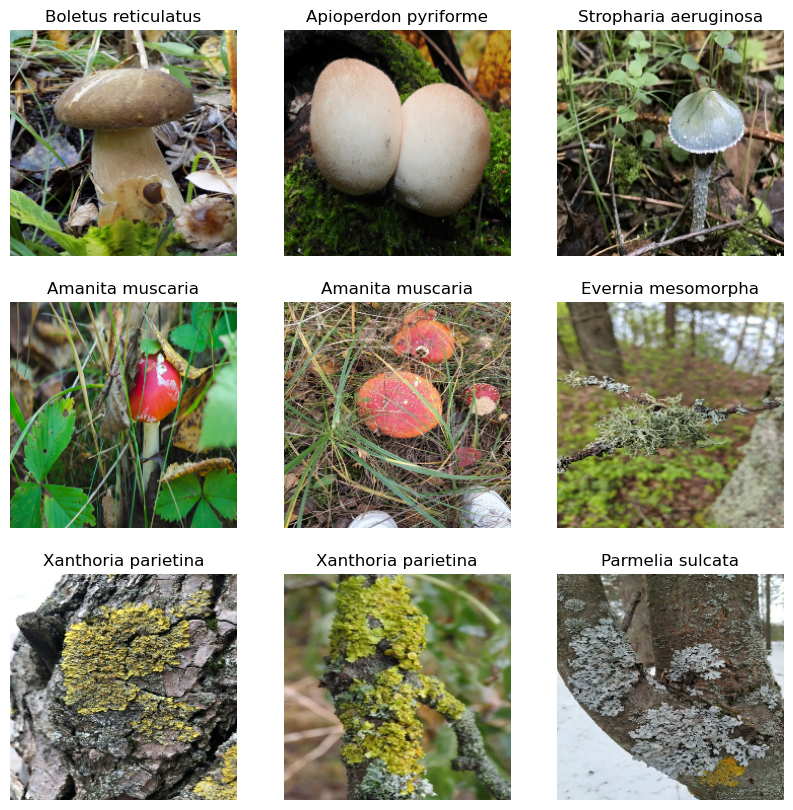

In [8]:
plt.figure(figsize=(10, 10))
for image, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        # Convert image[i] from float32 to uint8 (0-255 range)
        img = image[i].numpy() * 255.0  # scale back to 0-255
        img = img.astype(np.uint8)      # convert to uint8
        plt.imshow(img)
        plt.title(dataset_cat[labels[i]])
        plt.axis('off')

plt.show()

# 3. Building the Model

In [ ]:
from tf.keras.models import Sequential